# ArXiv Topic Modeling #

### Table of Contents ###
1. Overview<br/>
2. Importing Modules and Reading the Dataset<br/>
3. Data Cleaning and Exploration<br/>
4. Text Preprocessing - Tokenization and Parsing<br/>
5. Train/Test Split<br/>
6. Feature Selection - Truncated SVD<br/>
7. Building Cluster Models<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Latent Semantic Analysis<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Latent Dirichlet Allocation<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. Non-Negative Matrix Factorization<br/>
8. Analysis<br/>
9. Conclusion<br/>
10. Next Steps<br/>

### Overview ###

ArXiv is a repository consisting of over 1.5 million scientific papers in fields such as mathematics, computer science, and physics. It is owned and operated by Cornell University.

This capstone will explore the use of different topic modeling methods to predict the topics of each paper. I will be attempting to use Latent Semantic Analysis, Latent Dirichlet Allocation, and Non-Negative Matrix Factorization.

<a name="importing-modules-and-reading-the-dataset"></a>
### Importing Modules and Reading the Dataset ###

In [1]:
import pandas as pd
import numpy as np
import arxiv
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

nlp = spacy.load("en_core_web_md")

In [2]:
result = arxiv.query("math",max_results=100000)
math = pd.DataFrame(result)

result = arxiv.query("cs",max_results=100000)
cs = pd.DataFrame(result)

result = arxiv.query("physics",max_results=100000)
physics = pd.DataFrame(result)

In [3]:
df = pd.concat([math, cs, physics])

There are many different topics discussed in the arXiv scientific papers. I will be focusing solely on mathematics, computer science, and physics. As such I have imported 100,000 papers so I will be able to grab only 1000 of each topic.

In [4]:
df.head()

,affiliation,arxiv_comment,arxiv_primary_category,arxiv_url,author,author_detail,authors,doi,guidislink,id,...,pdf_url,published,published_parsed,summary,summary_detail,tags,title,title_detail,updated,updated_parsed
0,None,The 4 page short notes consists of comments on...,"{'term': 'physics.flu-dyn', 'scheme': 'http://...",http://arxiv.org/abs/1807.00200v1,Jiten C Kalita,{'name': 'Jiten C Kalita'},[Jiten C Kalita],None,True,http://arxiv.org/abs/1807.00200v1,...,http://arxiv.org/pdf/1807.00200v1,2018-06-30T16:43:48Z,"(2018, 6, 30, 16, 43, 48, 5, 181, 0)",In this short note we provide clarification to...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'physics.flu-dyn', 'scheme': 'http:/...","Comments on ""Comment on ""Finiteness of corner ...","{'type': 'text/plain', 'language': None, 'base...",2018-06-30T16:43:48Z,"(2018, 6, 30, 16, 43, 48, 5, 181, 0)"
1,None,None,"{'term': 'cs.IR', 'scheme': 'http://arxiv.org/...",http://arxiv.org/abs/1405.3353v1,Akiko Aizawa,{'name': 'Akiko Aizawa'},"[Minh-Quoc Nghiem, Giovanni Yoko Kristianto, G...",None,True,http://arxiv.org/abs/1405.3353v1,...,http://arxiv.org/pdf/1405.3353v1,2014-05-14T03:44:32Z,"(2014, 5, 14, 3, 44, 32, 2, 134, 0)",Mathematical content is a valuable information...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'cs.IR', 'scheme': 'http://arxiv.org...",Which one is better: presentation-based or con...,"{'type': 'text/plain', 'language': None, 'base...",2014-05-14T03:44:32Z,"(2014, 5, 14, 3, 44, 32, 2, 134, 0)"
2,None,LaTeX; to appear in J. Ramanujan Math. Soc,"{'term': 'math.NT', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/math/0110071v1,Chandrashekhar Khare,{'name': 'Chandrashekhar Khare'},"[Kirti Joshi, Chandrashekhar Khare]",None,True,http://arxiv.org/abs/math/0110071v1,...,http://arxiv.org/pdf/math/0110071v1,2001-10-05T20:55:39Z,"(2001, 10, 5, 20, 55, 39, 4, 278, 0)",This is a revised version of the preprint whic...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math.NT', 'scheme': 'http://arxiv.o...",On ordinary forms and ordinary Galois represen...,"{'type': 'text/plain', 'language': None, 'base...",2001-10-05T20:55:39Z,"(2001, 10, 5, 20, 55, 39, 4, 278, 0)"
3,None,2 pages,"{'term': 'math-ph', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/math-ph/0301030v1,Ali Mostafazadeh,{'name': 'Ali Mostafazadeh'},[Ali Mostafazadeh],10.1063/1.1540714,True,http://arxiv.org/abs/math-ph/0301030v1,...,http://arxiv.org/pdf/math-ph/0301030v1,2003-01-22T08:14:23Z,"(2003, 1, 22, 8, 14, 23, 2, 22, 0)","An error in the paper [J. Math. Phys. 43, 6343...","{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math-ph', 'scheme': 'http://arxiv.o...",Erratum: Pseudo-Hermiticity for a class of non...,"{'type': 'text/plain', 'language': None, 'base...",2003-01-22T08:14:23Z,"(2003, 1, 22, 8, 14, 23, 2, 22, 0)"
4,"University of Murcia, Spain","Latex, 1 page. Erratum to J. Math. Phys. 36, 3...","{'term': 'math-ph', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/math-ph/0308001v1,J. Guerrero,{'name': 'J. Guerrero'},"[V. Aldaya, J. Guerrero]",10.1063/1.1615698,True,http://arxiv.org/abs/math-ph/0308001v1,...,http://arxiv.org/pdf/math-ph/0308001v1,2003-08-01T17:39:26Z,"(2003, 8, 1, 17, 39, 26, 4, 213, 0)",The expression for $\hat{\kappa}$ in J. Math. ...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math-ph', 'scheme': 'http://arxiv.o...",Erratum to: Canonical coherent states for the ...,"{'type': 'text/plain', 'language': None, 'base...",2003-08-01T17:39:26Z,"(2003, 8, 1, 17, 39, 26, 4, 213, 0)"


In [5]:
df.shape

(13186, 22)

<a name="data-cleaning-and-exploration"></a>
### Data Cleaning and Exploration ###

In [6]:
df.columns

Index(['affiliation', 'arxiv_comment', 'arxiv_primary_category', 'arxiv_url',
       'author', 'author_detail', 'authors', 'doi', 'guidislink', 'id',
       'journal_reference', 'links', 'pdf_url', 'published',
       'published_parsed', 'summary', 'summary_detail', 'tags', 'title',
       'title_detail', 'updated', 'updated_parsed'],
      dtype='object')

As seen above, there are many features in this dataset. To predict the topic, I will only be using the text in the summary and title. All of the other features will not be beneficial to the clustering models. Below, I have added a feature "text" that is the concatenation of the summary and title. And I have dropped all of the other features.

In [7]:
df['text'] = df['summary'] + " " + df['title']
df = df.drop(columns=['affiliation','arxiv_comment','arxiv_url',
                     'author_detail','doi','guidislink','id',
                     'pdf_url','links','published','summary_detail',
                     'title_detail','updated','updated_parsed',
                     'journal_reference','tags','author','authors',
                     'published_parsed','summary','title'])

In [8]:
df['length'] = df['text'].apply(len)

In [9]:
df.head()

,arxiv_primary_category,text,length
0,"{'term': 'physics.flu-dyn', 'scheme': 'http://...",In this short note we provide clarification to...,318
1,"{'term': 'cs.IR', 'scheme': 'http://arxiv.org/...",Mathematical content is a valuable information...,673
2,"{'term': 'math.NT', 'scheme': 'http://arxiv.or...",This is a revised version of the preprint whic...,201
3,"{'term': 'math-ph', 'scheme': 'http://arxiv.or...","An error in the paper [J. Math. Phys. 43, 6343...",241
4,"{'term': 'math-ph', 'scheme': 'http://arxiv.or...",The expression for $\hat{\kappa}$ in J. Math. ...,197


I will be utilizing the "arxiv_primary_category" feature as my outcome variable. However the dataset's version of the feature is too complex. Below, I strip down each primary category.

In [10]:
df['arxiv_primary_category'] = df['arxiv_primary_category'].astype(str).str.replace('{\'term\': \'','').str.replace(r'\.(.*)','').str.replace(r'\',(.*)','')

In [11]:
df['arxiv_primary_category'].unique()

array(['physics', 'cs', 'math', 'math-ph', 'nlin', 'q-alg', 'solv-int',
       'hep-th', 'alg-geom', 'cond-mat', 'gr-qc', 'quant-ph', 'dg-ga',
       'hep-ph', 'funct-an', 'astro-ph', 'chao-dyn', 'hep-lat', 'q-bio',
       'q-fin', 'nucl-ex', 'eess', 'nucl-th', 'stat', 'hep-ex', 'econ',
       'cmp-lg', 'adap-org', 'atom-ph', 'acc-phys', 'chem-ph', 'plasm-ph'],
      dtype=object)

With the categories stripped down there are much fewer unique outcomes.

In [12]:
df['arxiv_primary_category'].value_counts()

math        2758
physics     1746
hep-ph      1391
math-ph     1323
hep-th      1025
cs           980
astro-ph     980
quant-ph     891
cond-mat     743
hep-ex       441
gr-qc        209
hep-lat      196
nucl-th      131
nlin          80
nucl-ex       53
stat          53
eess          51
q-bio         31
cmp-lg        21
q-alg         19
solv-int      14
dg-ga         10
funct-an       9
alg-geom       6
chao-dyn       6
q-fin          5
atom-ph        5
chem-ph        3
econ           2
plasm-ph       2
acc-phys       1
adap-org       1
Name: arxiv_primary_category, dtype: int64

In [13]:
df_math = df.loc[df['arxiv_primary_category'] == 'math']
df_cs = df.loc[df['arxiv_primary_category'] == 'cs']
df_physics = df.loc[df['arxiv_primary_category'] == 'physics']

In [14]:
from sklearn.utils import resample

df_math = resample(df_math, replace=False, n_samples=1000, random_state=123)
df_cs = resample(df_cs, replace=True, n_samples=1000, random_state=123)
df_physics = resample(df_physics, replace=True, n_samples=1000, random_state=123)

df2 = pd.concat([df_math, df_cs, df_physics])
df2.reset_index(inplace=True)

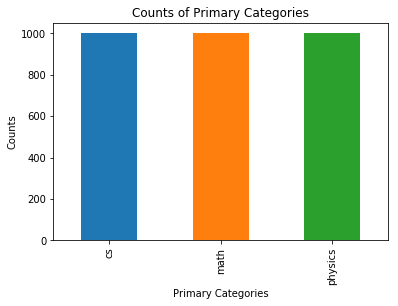

In [15]:
ax = df2['arxiv_primary_category'].value_counts().plot(kind='bar',title='Counts of Primary Categories')
ax.set_ylabel('Counts')
ax.set_xlabel('Primary Categories');

Now my new dataframe only consists of 1000 papers of each mathematics, computer science, and physics.

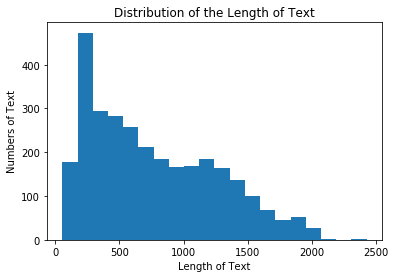

In [16]:
plt.hist(df2['length'],bins=20)
plt.title('Distribution of the Length of Text')
plt.ylabel('Numbers of Text')
plt.xlabel('Length of Text');

Above is a distribution of the length of each text. The distribution is very skewed to the right. This may become problematic as this suggests the majority of the texts are not very long.

<a name="text-preprocessing"></a>
### Text Preprocessing - Tokenization and Parsing ###

In [17]:
tokens = []
lemma = []
pos = []

for doc in nlp.pipe(df2['text'].astype('unicode').values, batch_size=50,
                        n_threads=3):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        tokens.append(None)
        lemma.append(None)
        pos.append(None)

df2['tokens'] = tokens
df2['lemma'] = lemma
df2['pos'] = pos

Here I am tokenizing and parsing the text in the "text" feature. This is adding 3 new columns of the tokens, lemmas, and parts of speech for each title and summary. As well as another feature "text_parsed" which contains the word vectors.

In [18]:
df2['text_parsed'] = df2['text'].apply(lambda x: nlp(x).vector)

In [19]:
df2.isnull().sum()

index                     0
arxiv_primary_category    0
text                      0
length                    0
tokens                    0
lemma                     0
pos                       0
text_parsed               0
dtype: int64

There are no null values.

In [20]:
df2.dtypes

index                      int64
arxiv_primary_category    object
text                      object
length                     int64
tokens                    object
lemma                     object
pos                       object
text_parsed               object
dtype: object

## Topic Modeling ##

In [21]:
df2.head()

,index,arxiv_primary_category,text,length,tokens,lemma,pos,text_parsed
0,1718,math,We address questions posed by Lorenzini about ...,373,"[We, address, questions, posed, by, Lorenzini,...","[-PRON-, address, question, pose, by, Lorenzin...","[PRON, VERB, NOUN, VERB, ADP, PROPN, ADP, NOUN...","[-0.07157211, 0.13698319, -0.16199416, -0.0657..."
1,580,math,The first examples of exceptional terminal sin...,111,"[The, first, examples, of, exceptional, termin...","[the, first, example, of, exceptional, termina...","[DET, ADJ, NOUN, ADP, ADJ, ADJ, NOUN, VERB, VE...","[0.045607943, 0.15251319, -0.060608286, -0.052..."
2,1267,math,We give upper and lower bounds on the volume o...,386,"[We, give, upper, and, lower, bounds, on, the,...","[-PRON-, give, upper, and, low, bound, on, the...","[PRON, VERB, ADJ, CCONJ, ADJ, NOUN, ADP, DET, ...","[0.010917322, 0.11767871, -0.18705297, -0.0365..."
3,2525,math,"We introduce a ""resonance"" method to produce l...",170,"[We, introduce, a, "", resonance, "", method, to...","[-PRON-, introduce, a, "", resonance, "", method...","[PRON, VERB, DET, PUNCT, NOUN, PUNCT, NOUN, PA...","[-0.071798705, 0.25227556, -0.075050205, -0.01..."
4,65,math,We show that the Jacobian conjecture of the tw...,100,"[We, show, that, the, Jacobian, conjecture, of...","[-PRON-, show, that, the, jacobian, conjecture...","[PRON, VERB, ADP, DET, ADJ, NOUN, ADP, DET, NU...","[0.02597978, 0.16496399, -0.24026667, -0.09325..."


In [22]:
df2['text_doc'] = df2['text'].apply(lambda x: nlp(x))

In [25]:
selective_text = []

for token in df2['text_doc']:
    selective_text.append([word.lemma_ for word in token if (word.pos_ == 'NOUN') or (word.pos_ == 'ADJ') or (word.pos_ == 'PROPN')])

df2['selective_text'] = selective_text

df2['selective_text']=[" ".join(word) for word in df2['selective_text'].values]

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

In [125]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df2['selective_text'])
vectors.shape

(3000, 10787)

In [128]:
vocab = np.array(vectorizer.get_feature_names())

In [129]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=1)
tfidf = tfidf_vectorizer.fit_transform(df2['selective_text'])
tfidf.shape

(3000, 10787)

In [131]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [132]:
def top_word(a):
    top_word = lambda t: [vocab[i] for i in np.argsort(t)[:-1-1:-1]]
    topic_word = ([top_word(t) for t in a])
    return [' '.join(t) for t in topic_word]

In [133]:
from gensim.corpora import Dictionary
dictionary = Dictionary(df2['tokens'])
corpus = [dictionary.doc2bow(text) for text in df2['tokens']]

In [134]:
def calc_coherence(text):
    cm = CoherenceModel(topics=top_word(text), texts=df2['tokens'], corpus=corpus, dictionary=dictionary)
    return cm.get_coherence()

### Latent Semantic Analysis ###

In [173]:
lsa = TruncatedSVD(n_components=3)
W1 = lsa.fit_transform(tfidf)
H1 = lsa.components_

print(W1.shape)
print(H1.shape)

(3000, 3)
(3, 10787)


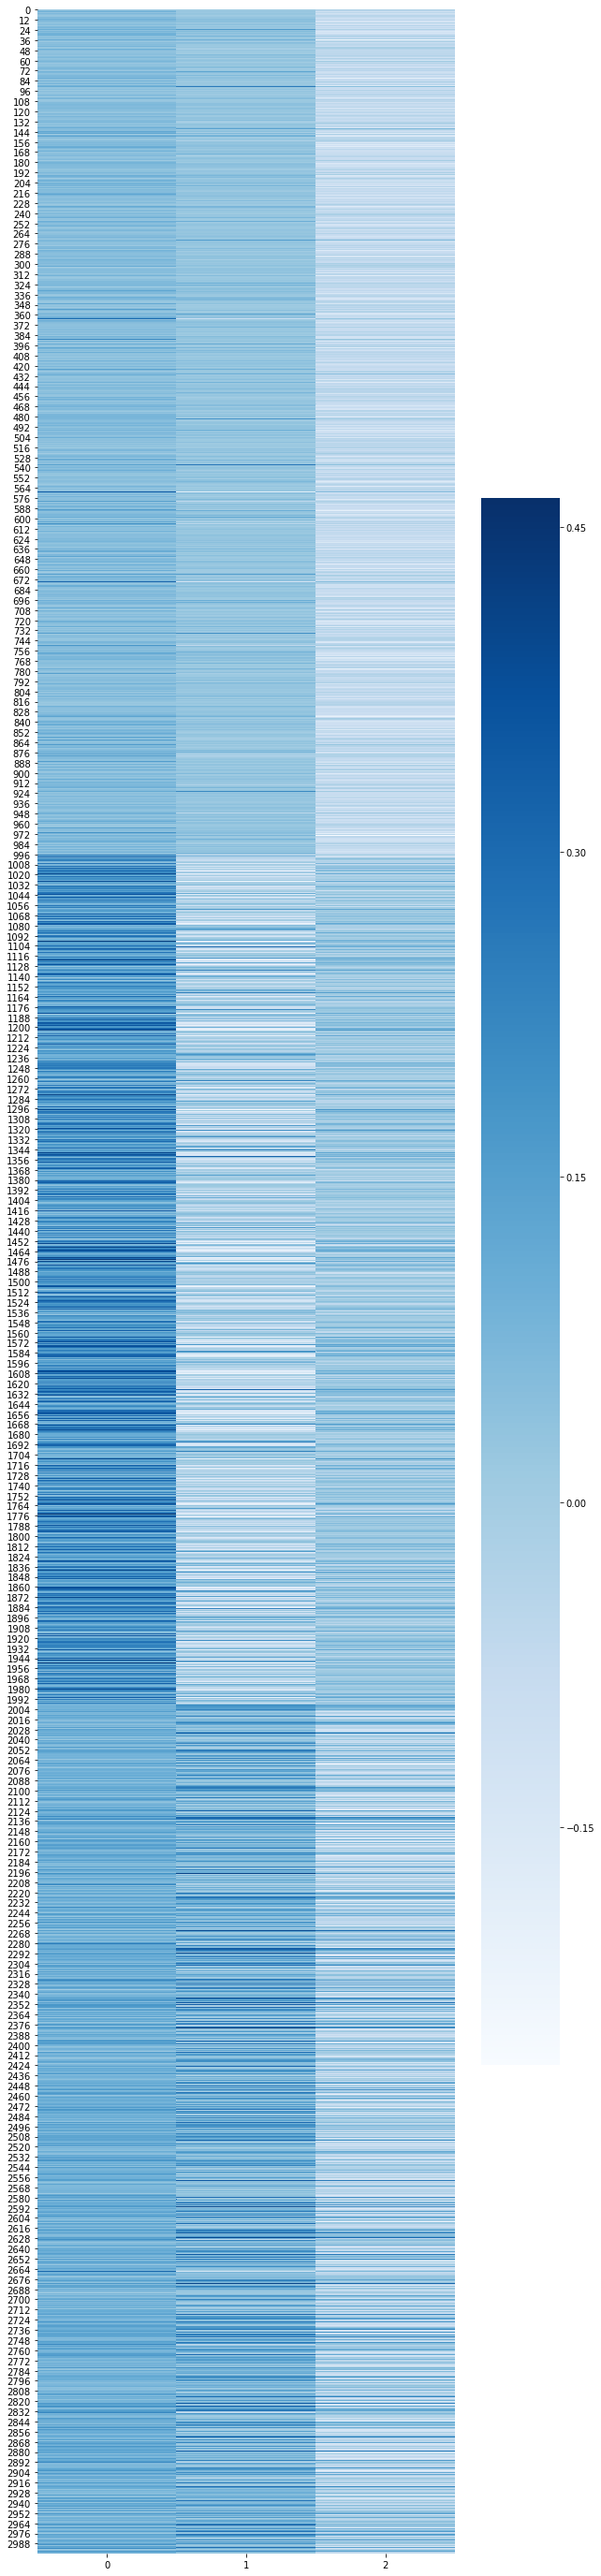

In [193]:
plt.figure(figsize=(10,50))
sns.heatmap(W1,cmap='Blues');

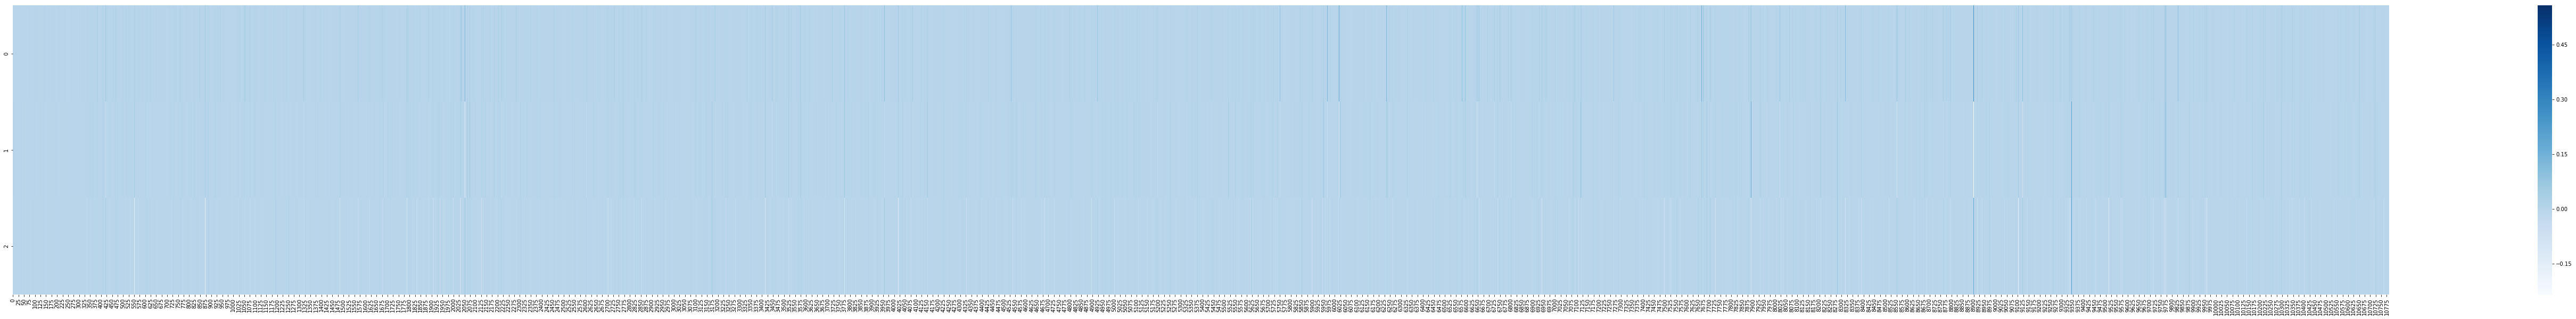

In [192]:
plt.figure(figsize=(100,10))
sns.heatmap(H1,cmap='Blues');

In [136]:
show_topics(H1)

['cs signal sparse algorithm physics sensing measurement reconstruction',
 'physics physical student quantum theory course science particle',
 'physics student signal course sparse reconstruction sensing algorithm']

In [137]:
calc_coherence(H1)

0.47689653784764247

In [138]:
lsa = TruncatedSVD(n_components=5)
W1 = lsa.fit_transform(tfidf)
H1 = lsa.components_

print(W1.shape)
print(H1.shape)

(3000, 5)
(5, 10787)


In [139]:
show_topics(H1)

['cs signal sparse algorithm physics sensing measurement reconstruction',
 'physics physical student quantum theory course science particle',
 'physics student signal course sparse reconstruction sensing algorithm',
 'atom state transition optical atomic frequency molecule laser',
 'physical image network mri reconstruction model deep datum']

In [140]:
calc_coherence(H1)

0.45090909706877963

In [141]:
lsa = TruncatedSVD(n_components=10)
W1 = lsa.fit_transform(tfidf)
H1 = lsa.components_

print(W1.shape)
print(H1.shape)

(3000, 10)
(10, 10787)


In [142]:
show_topics(H1)

['cs signal sparse algorithm physics sensing measurement reconstruction',
 'physics physical student quantum theory course science particle',
 'physics student signal course sparse reconstruction sensing algorithm',
 'atom state transition optical atomic frequency molecule laser',
 'physical image network mri reconstruction model deep datum',
 'physical signal theory quantum sparse cyber object recovery',
 'group quantum image theory signal algebra measurement sampling',
 'group student surface course physical frequency network computer',
 'quantum algorithm problem group theory mechanic atom channel',
 'matrix group student physical measurement course state atom']

In [143]:
calc_coherence(H1)

0.3585987393855403

In [144]:
k_values = []
coherences = []
for k in range(1,11):
    lsa = TruncatedSVD(n_components=k)
    W1 = lsa.fit_transform(tfidf)
    H1 = lsa.components_
    k_values.append(k)
    coherences.append(calc_coherence(H1))
    print("K=%02d: Coherence=%.4f" % (k, coherences[-1]))

K=01: Coherence=0.5128
K=02: Coherence=0.5276
K=03: Coherence=0.4769
K=04: Coherence=0.4834
K=05: Coherence=0.4509
K=06: Coherence=0.4187
K=07: Coherence=0.4031
K=08: Coherence=0.3873
K=09: Coherence=0.3677
K=10: Coherence=0.3586


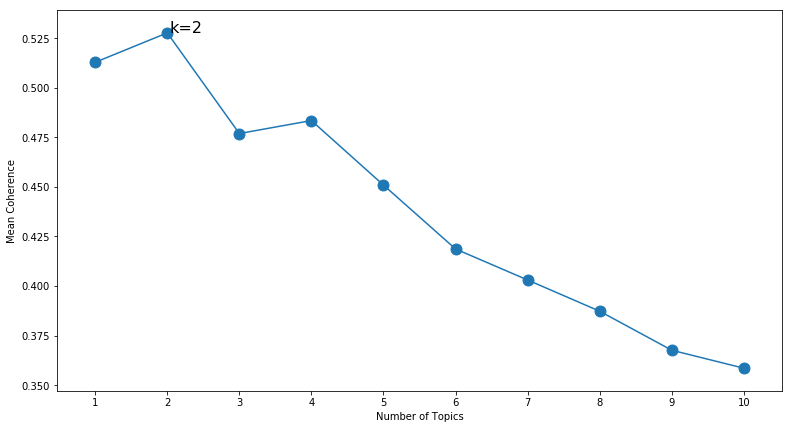

In [145]:
fig = plt.figure(figsize=(13,7))
ax = plt.plot(k_values, coherences)
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
plt.scatter(k_values, coherences, s=120)
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
plt.show()

### Latent Dirichlet Allocation ###

In [146]:
lda = LatentDirichletAllocation(n_components=3, random_state=0)

W1 = lda.fit_transform(tfidf)
H1 = lda.components_

print(W1.shape)
print(H1.shape)

(3000, 3)
(3, 10787)


In [147]:
show_topics(H1)

['group space algebra manifold theorem equation curve surface',
 'cs signal algorithm sparse method measurement sensing matrix',
 'physics physical student quantum problem theory science time']

In [148]:
calc_coherence(H1)

0.47931654360675163

In [149]:
lda = LatentDirichletAllocation(n_components=5, random_state=0)

W1 = lda.fit_transform(tfidf)
H1 = lda.components_

print(W1.shape)
print(H1.shape)

(3000, 5)
(5, 10787)


In [150]:
show_topics(H1)

['group curve theory manifold entropy inequality lorentz quantum',
 'physics space function physical model theory group math',
 'cs signal algorithm physics sparse sensing measurement problem',
 'physics atom equation surface field transition group interaction',
 'physics laser theory result atom group transition cs']

In [151]:
calc_coherence(H1)

0.4369925476933858

In [152]:
lda = LatentDirichletAllocation(n_components=10, random_state=0)

W1 = lda.fit_transform(tfidf)
H1 = lda.components_

print(W1.shape)
print(H1.shape)

(3000, 10)
(10, 10787)


In [153]:
show_topics(H1)

['group curve cohomology variety identity projective hypersurface picard',
 'cs signal algorithm sparse sensing measurement method reconstruction',
 'physics physical student quantum theory problem space science',
 'radar group physics economic simple subgroup loop injector',
 'comb ev charge doa vision math operational bcs',
 'manifold surface group theory class space finite module',
 'speech surface interface uwb foundational asr language computing',
 'accelerator wavelet neutron social orbital nwb title neutrino',
 'atom state molecule transition ultracold interaction atomic ground',
 'quantum lambda lung nodule der sda dear peak']

In [154]:
calc_coherence(H1)

0.4281960665211143

In [155]:
k_values = []
coherences = []
for k in range(1,11):
    lda = LatentDirichletAllocation(n_components=k, random_state=0)
    W1 = lda.fit_transform(tfidf)
    H1 = lda.components_
    k_values.append(k)
    coherences.append(calc_coherence(H1))
    print("K=%02d: Coherence=%.4f" % (k, coherences[-1]))

K=01: Coherence=0.3754
K=02: Coherence=0.3755
K=03: Coherence=0.4793
K=04: Coherence=0.4634
K=05: Coherence=0.4370
K=06: Coherence=0.4374
K=07: Coherence=0.3711
K=08: Coherence=0.3230
K=09: Coherence=0.3889
K=10: Coherence=0.4282


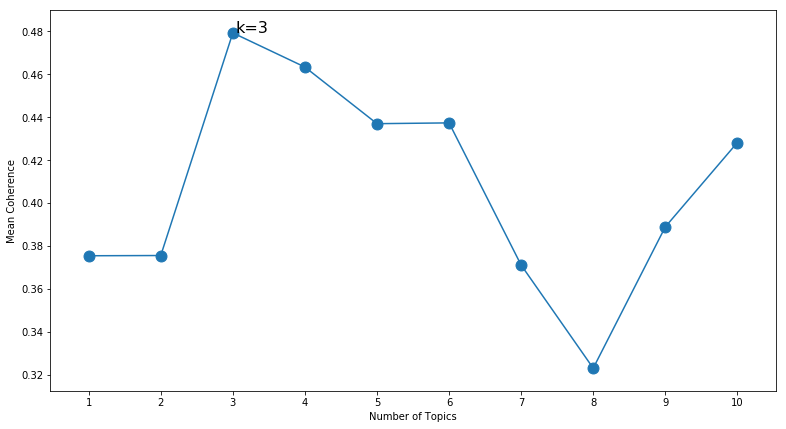

In [156]:
fig = plt.figure(figsize=(13,7))
ax = plt.plot(k_values, coherences)
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
plt.scatter(k_values, coherences, s=120)
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
plt.show()

### Non-Negative Matrix Factorization ###

In [157]:
clf = NMF(n_components=3, random_state=1)

W1 = clf.fit_transform(tfidf)
H1 = clf.components_

print(W1.shape)
print(H1.shape)

(3000, 3)
(3, 10787)


In [158]:
show_topics(H1)

['signal cs sparse algorithm sensing reconstruction measurement compressive',
 'physics student physical course science quantum theory research',
 'group atom space function field state theory surface']

In [159]:
calc_coherence(H1)

0.3138787785795287

In [160]:
clf = NMF(n_components=5, random_state=1)

W1 = clf.fit_transform(tfidf)
H1 = clf.components_

print(W1.shape)
print(H1.shape)

(3000, 5)
(5, 10787)


In [161]:
show_topics(H1)

['signal sparse cs algorithm sensing measurement recovery compressive',
 'physics student physical course quantum science theory research',
 'group space function algebra equation theory manifold theorem',
 'atom transition state atomic optical frequency cs molecule',
 'image network mri reconstruction deep cs datum method']

In [162]:
calc_coherence(H1)

0.29021553195664895

In [163]:
clf = NMF(n_components=10, random_state=1)

W1 = clf.fit_transform(tfidf)
H1 = clf.components_

print(W1.shape)
print(H1.shape)

(3000, 10)
(10, 10787)


In [164]:
show_topics(H1)

['signal sparse cs sensing recovery algorithm reconstruction compressive',
 'physics student course science research introductory teaching particle',
 'space function equation manifold theorem math operator differential',
 'atom state transition optical atomic frequency molecule cs',
 'image reconstruction mri network deep cs datum method',
 'physical theory quantum model object cyber computation mathematical',
 'group algebra quantum lie representation action surface subgroup',
 'channel mimo estimation user cs scheme massive performance',
 'problem algorithm graph time polynomial solution decision np',
 'matrix measurement random binary sensing orthogonal gaussian linear']

In [165]:
calc_coherence(H1)

0.3404127409406722

In [166]:
k_values = []
coherences = []
for k in range(1,11):
    clf = NMF(n_components=k, random_state=1)
    W1 = clf.fit_transform(tfidf)
    H1 = clf.components_
    k_values.append(k)
    coherences.append(calc_coherence(H1))
    print("K=%02d: Coherence=%.4f" % (k, coherences[-1]))

K=01: Coherence=0.5128
K=02: Coherence=0.3478
K=03: Coherence=0.3139
K=04: Coherence=0.2984
K=05: Coherence=0.2902
K=06: Coherence=0.2953
K=07: Coherence=0.2903
K=08: Coherence=0.2843
K=09: Coherence=0.3316
K=10: Coherence=0.3404


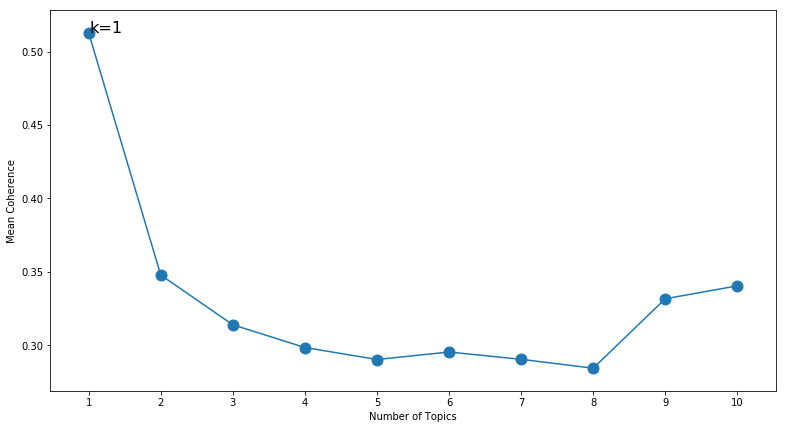

In [167]:
fig = plt.figure(figsize=(13,7))
ax = plt.plot(k_values, coherences)
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
plt.scatter(k_values, coherences, s=120)
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
plt.show()